In [ ]:
"""This sript reads xlsx files provided by Facebook with a glimpse of data on Visible Hand group.
Each file consists of several sheets, where two are of interest for this analysis:
a) Daily numbers, with data like date, number of new posts, etc
b) top posts, where posts from last 28 days are collected."""

In [1]:
# Import libraries

import pandas as pd
import os
import googletrans as gt
import matplotlib.pyplot as plt

Index(['Date', 'Posts', 'Comments', 'Reactions', 'Active members',
       'Total members', 'Pending members', 'Approved member requests',
       'Declined member requests'],
      dtype='object')


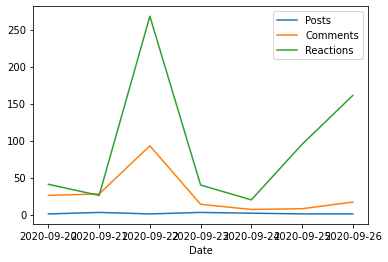

In [8]:
# Reading the first file, and ploting interest plot for posts, comments and reactions

glimpse = pd.read_excel("data/Facebook_Group_Insights_10-25-2020.xlsx", sheet_name="Daily numbers")
print(glimpse.columns)
glimpse.head()
glimpse.plot(kind="line", x="Date", y=["Posts", "Comments", "Reactions"])
plt.show()